**Clustering Algorithms: EM vs K-Means**

In [1]:
# ============================================
# 📊 Clustering Algorithms: EM vs K-Means
# Objective: Explore Unsupervised Learning
# ============================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.metrics import silhouette_score

**Preprocessing Data**

In [2]:
# ======================
# 1️⃣ Load & Preprocess Data
# ======================
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)

# Standardize data for better clustering performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**K-Means**

In [3]:
# ======================
# 2️⃣ K-Means Clustering
# ======================
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Evaluate
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
print(f"K-Means Silhouette Score: {kmeans_silhouette:.3f}")

K-Means Silhouette Score: 0.480


**Expectation-Maximization**

In [4]:
# ======================
# 3️⃣ Expectation-Maximization (Gaussian Mixture Model)
# ======================
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(X_scaled)

# Evaluate
gmm_silhouette = silhouette_score(X_scaled, gmm_labels)
print(f"EM (GMM) Silhouette Score: {gmm_silhouette:.3f}")

EM (GMM) Silhouette Score: 0.475


**Comparing Results**

In [5]:
# ======================
# 4️⃣ Compare Cluster Results
# ======================
comparison_df = pd.DataFrame({
    'KMeans': kmeans_labels,
    'EM(GMM)': gmm_labels,
    'Actual': iris.target
})
print("\nCluster Comparison (first 10 rows):")
print(comparison_df.head(10))


Cluster Comparison (first 10 rows):
   KMeans  EM(GMM)  Actual
0       1        1       0
1       2        1       0
2       2        1       0
3       2        1       0
4       1        1       0
5       1        1       0
6       1        1       0
7       1        1       0
8       2        2       0
9       2        1       0


**Visualization - KMeans**

Text(0, 0.5, 'sepal width (cm)')

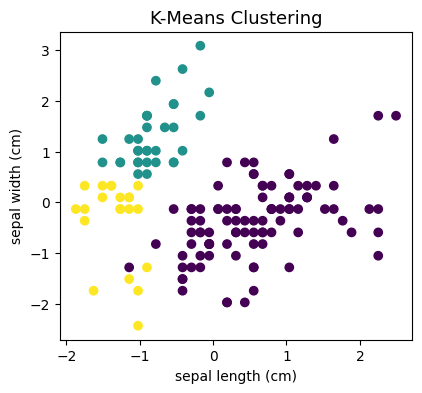

In [6]:
# ======================
# 5️⃣ Visualization - KMeans
# ======================
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=kmeans_labels, cmap='viridis')
plt.title("K-Means Clustering", fontsize=13)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

**Visualization - EM (GMM)**

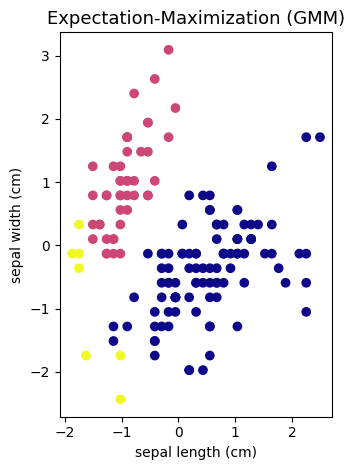

In [7]:
# ======================
# 6️⃣ Visualization - EM (GMM)
# ======================
plt.subplot(1,2,2)
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=gmm_labels, cmap='plasma')
plt.title("Expectation-Maximization (GMM)", fontsize=13)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

plt.tight_layout()
plt.show()

**Visualization with Heatmaps**

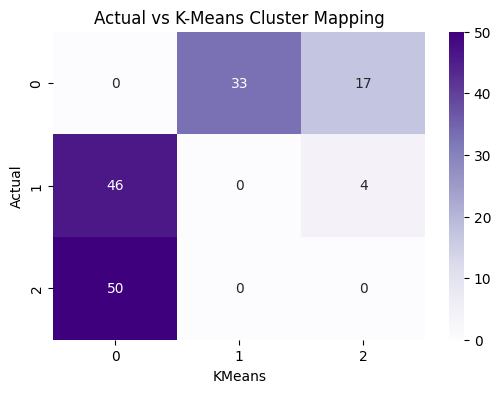

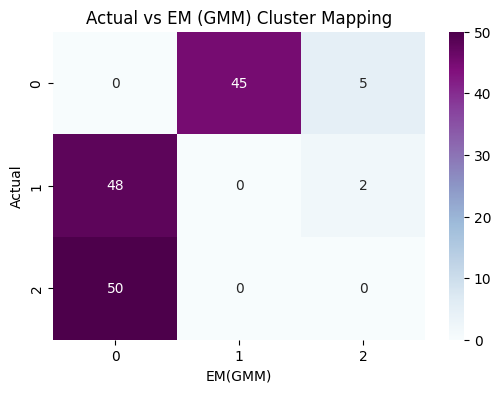

In [8]:
# ======================
# 7️⃣ Visualize with Heatmaps for Clarity
# ======================
plt.figure(figsize=(6,4))
sns.heatmap(pd.crosstab(comparison_df['Actual'], comparison_df['KMeans']),
            annot=True, cmap='Purples', fmt='d')
plt.title("Actual vs K-Means Cluster Mapping")
plt.show()

plt.figure(figsize=(6,4))
sns.heatmap(pd.crosstab(comparison_df['Actual'], comparison_df['EM(GMM)']),
            annot=True, cmap='BuPu', fmt='d')
plt.title("Actual vs EM (GMM) Cluster Mapping")
plt.show()